In [82]:
# load the required libraries

import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time

In [83]:
def get_page(URL):
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)

    page = session.get(URL)
    return page

In [84]:
def get_soup(page):
    print("Status Code: ", page.status_code)
    htmlcode = page.text
    soup = BeautifulSoup(htmlcode)
    return soup

In [85]:
def get_questions(soup):
    ques_lst = []
    Covid = soup.find_all('div', attrs = {'class': 'sf-accordion__trigger-panel'})
    for i in Covid:
        string = i.text
        string = string.strip()
        ques_lst.append(string)
    print("Number of Questions: ", len(ques_lst))
    return ques_lst

In [86]:
def get_answers(soup):
    ans_lst = []
    Covid = soup.find_all('div', attrs = {'class': 'sf-accordion__content'})
    for i in Covid:
        string = i.text
        string = string.strip()
        ans_lst.append(string)
    print("Number of Answers: ", len(ans_lst))
    return ans_lst

## Scraping the dataset

In [87]:
URL_1 = 'https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/coronavirus-disease-covid-19'
URL_2 = 'https://www.who.int/news-room/questions-and-answers/item/coronavirus-disease-(covid-19)-post-covid-19-condition'
URL_3 = 'https://www.who.int/news-room/questions-and-answers/item/coronavirus-disease-covid-19-dexamethasone'

In [88]:
# Get Questions and Answers Dataframe
def get_ques_ans_dataframe(URL):
    page = get_page(URL)
    soup = get_soup(page)
    ques = get_questions(soup)
    ans = get_answers(soup)
    df = pd.DataFrame({'questions':ques, 'answers':ans})
    
    return df

In [89]:
# Dataset 1
df_1 = get_ques_ans_dataframe(URL_1)
df_1.head()

Status Code:  200
Number of Questions:  16
Number of Answers:  16


,questions,answers
0,What is COVID-19?,COVID-19 is the disease caused by a coronaviru...
1,What are the symptoms of COVID-19?,The most common symptoms of COVID-19 arefever ...
2,What happens to people who get COVID-19?,"As testing rates fall, it is more difficult to..."
3,Who is most at risk of severe illness from COV...,"People aged 60 years and over, and those with ..."
4,Are there long-term effects of COVID-19?,"Some people who have had COVID-19, whether the..."


In [90]:
# Dataset 2
df_2 = get_ques_ans_dataframe(URL_2)
df_2.head()

Status Code:  200
Number of Questions:  11
Number of Answers:  11


,questions,answers
0,What is post COVID-19 condition?,"Post COVID-19 condition, also known as long CO..."
1,How soon after getting COVID-19 can someone be...,Post COVID-19 condition is usually diagnosed b...
2,What are common symptoms of post COVID-19 cond...,"Symptoms differ between people, and between ad..."
3,What should I do if I have had COVID-19 and am...,"If you have ongoing symptoms after COVID-19, s..."
4,Who is most at risk of developing post COVID-1...,Anyone can develop post COVID-19 condition. Re...


In [91]:
# Dataset 3
df_3 = get_ques_ans_dataframe(URL_3)
df_3.head()

Status Code:  200
Number of Questions:  10
Number of Answers:  10


,questions,answers
0,"I have COVID-19, should I be prescribed cortic...",Corticosteroids are lifesaving medicines recom...
1,What are corticosteroids and how do they work ...,"Corticosteroids, including dexamethasone, have..."
2,What is the benefit of corticosteroid treatment?,Current evidence comes from the combined resul...
3,How are corticosteroids administered and what ...,Corticosteroids are given as a pill or via inj...
4,Are corticosteroids suitable for anyone with C...,WHO recommends that only patients who have sev...


## Merging dataset

In [92]:
dataset = pd.concat([df_1, df_2, df_3])
dataset = dataset.reset_index(drop=True)
dataset

,questions,answers
0,What is COVID-19?,COVID-19 is the disease caused by a coronaviru...
1,What are the symptoms of COVID-19?,The most common symptoms of COVID-19 arefever ...
2,What happens to people who get COVID-19?,"As testing rates fall, it is more difficult to..."
3,Who is most at risk of severe illness from COV...,"People aged 60 years and over, and those with ..."
4,Are there long-term effects of COVID-19?,"Some people who have had COVID-19, whether the..."
5,How can we protect others and ourselves if we ...,You can protect yourself and others from COVID...
6,When should I get a test for COVID-19?,Anyone with symptoms such as acute onset of fe...
7,What test should I get to see if I have COVID-19?,There are two main types of tests that can con...
8,I want to find out if I had COVID-19 in the pa...,Antibody tests can tell us whether someone has...
9,What is the difference between isolation and q...,Both isolation and quarantine are methods of p...


## Dataset Pre-processing

In [93]:
import nltk

In [94]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
from nltk.corpus import stopwords

In [96]:
nltk.corpus.names

<WordListCorpusReader in '.../corpora/names' (not loaded yet)>

In [97]:
sw_list = stopwords.words("english")

In [98]:
Questions = dataset["questions"][0]

In [99]:
Questions

'What is COVID-19?'

In [100]:
Questions = Questions.split()

In [101]:
Questions

['What', 'is', 'COVID-19?']

In [102]:
Questions = [word for word in Questions if word not in sw_list]

In [103]:
Questions

['What', 'COVID-19?']

In [104]:
from nltk.stem import WordNetLemmatizer

In [105]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [106]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Lemmatization

In [107]:
lemma = WordNetLemmatizer()

In [108]:
Questions = [lemma.lemmatize(word, pos="v") for word in Questions if word not in sw_list]

In [109]:
Questions = " ".join(Questions)

In [110]:
Questions

'What COVID-19?'

In [111]:
import re

In [112]:
def text_preprocessing(Questions):
    '''
    Preprocesses the given sentence
    '''
    re_punt = "[^A-Za-z0-9!?\s]"
    ### Removing the unwanted puncuations ###
    Questions = re.sub(re_punt, "",Questions)
    ##Normalising the case##
    Questions = Questions.lower()
    ### Tokenization ##
    Questions = Questions.split()
    ### Removal of stop word and Lemmatization ###
    Questions = [lemma.lemmatize(word, pos="v") for word in Questions if word not in sw_list]
    ## Join ###
    Questions = " ".join(Questions)
    return Questions

In [113]:
pre_dataset = pd.DataFrame()
pre_dataset["questions"] = dataset["questions"].apply(text_preprocessing)
pre_dataset["answers"] = dataset["answers"]

In [114]:
pre_dataset

,questions,answers
0,covid19?,COVID-19 is the disease caused by a coronaviru...
1,symptoms covid19?,The most common symptoms of COVID-19 arefever ...
2,happen people get covid19?,"As testing rates fall, it is more difficult to..."
3,risk severe illness covid19?,"People aged 60 years and over, and those with ..."
4,longterm effect covid19?,"Some people who have had COVID-19, whether the..."
5,protect others dont know infected?,You can protect yourself and others from COVID...
6,get test covid19?,Anyone with symptoms such as acute onset of fe...
7,test get see covid19?,There are two main types of tests that can con...
8,want find covid19 past test could take?,Antibody tests can tell us whether someone has...
9,difference isolation quarantine?,Both isolation and quarantine are methods of p...


In [115]:
para = " ".join(pre_dataset["questions"])
para = " ".join(pre_dataset["answers"])

### Word Cloud

In [116]:
!pip install wordcloud --quiet

In [117]:
from wordcloud import WordCloud

In [118]:
wc = WordCloud( width=600,
    height=400,background_color='white')

In [119]:
wc

In [120]:
word_count

{'COVID-19': 55,
 'is': 30,
 'the': 68,
 'disease': 9,
 'caused': 3,
 'by': 13,
 'a': 54,
 'coronavirus': 1,
 'called': 4,
 'SARS-CoV-2.': 1,
 'WHO': 12,
 'first': 6,
 'learned': 1,
 'of': 74,
 'this': 6,
 'new': 1,
 'virus': 9,
 'on': 16,
 '31': 1,
 'December': 2,
 '2019,': 1,
 'following': 4,
 'report': 2,
 'cluster': 1,
 'cases': 1,
 'so-called': 1,
 'viral': 3,
 'pneumonia': 1,
 'in': 49,
 'Wuhan,': 1,
 'People’s': 1,
 'Republic': 1,
 'China.': 1,
 'The': 10,
 'most': 10,
 'common': 7,
 'symptoms': 21,
 'arefever': 1,
 'chillssore': 1,
 'throat.Other': 1,
 'that': 24,
 'are': 46,
 'less': 1,
 'and': 89,
 'may': 11,
 'affect': 3,
 'some': 4,
 'patients': 14,
 'include:muscle': 1,
 'achessevere': 1,
 'fatigue': 1,
 'or': 78,
 'tirednessrunny': 1,
 'blocked': 1,
 'nose,': 1,
 'sneezingheadachesore': 1,
 'eyesdizzinessnew': 1,
 'persistent': 2,
 'coughtight': 1,
 'chest': 2,
 'painshortness': 1,
 'breathhoarse': 1,
 'voiceheavy': 1,
 'arms/legsnumbness/tinglingnausea,': 1,
 'vomiting,'

## Exploratory Data Analysis

In [121]:
# Loading the dataset into the new dataframe
cdf = pre_dataset

# Print the number of rows and columns in the DataFrame
print("Shape of the DataFrame:", cdf.shape)


Shape of the DataFrame: (37, 2)


In [122]:
# Print the first few rows of the DataFrame
print("\nFirst three rows of the DataFrame:")
print(cdf.head(3))



First three rows of the DataFrame:
                    questions  \
0                    covid19?   
1           symptoms covid19?   
2  happen people get covid19?   

                                             answers  
0  COVID-19 is the disease caused by a coronaviru...  
1  The most common symptoms of COVID-19 arefever ...  
2  As testing rates fall, it is more difficult to...  


In [123]:
# Count the number of unique questions
print("\nNumber of unique questions:", cdf['questions'].nunique())



Number of unique questions: 37


In [124]:
# Count the number of unique answers
print("Number of unique answers:", cdf['answers'].nunique())


Number of unique answers: 37


In [125]:
# Get summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(cdf.describe())


Summary statistics of the DataFrame:
       questions                                            answers
count         37                                                 37
unique        37                                                 37
top     covid19?  COVID-19 is the disease caused by a coronaviru...
freq           1                                                  1


### Visualizing the distribution length of questions

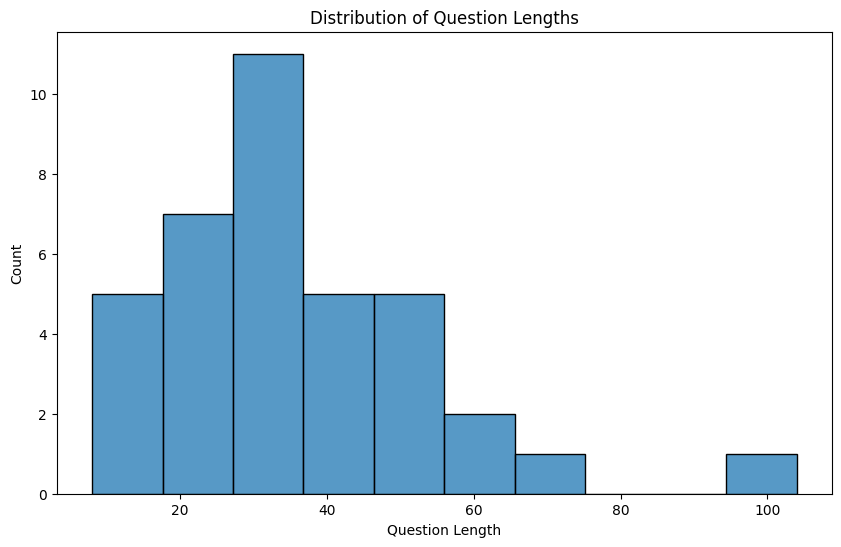

In [126]:
# Visualizing the distribution -length of questions
cdf['question_length'] = cdf['questions'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=cdf, x='question_length', bins=10)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Count')
plt.show()



### Word Frequency Analysis

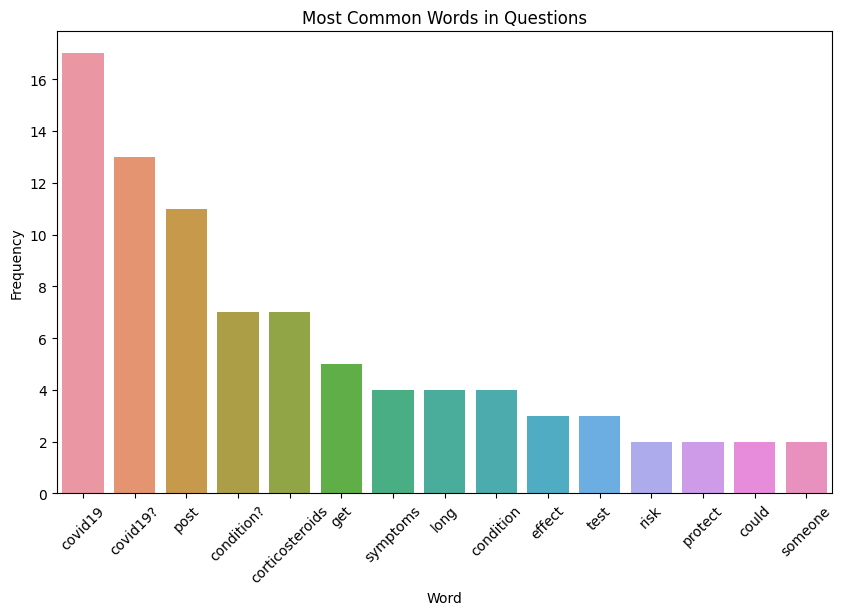

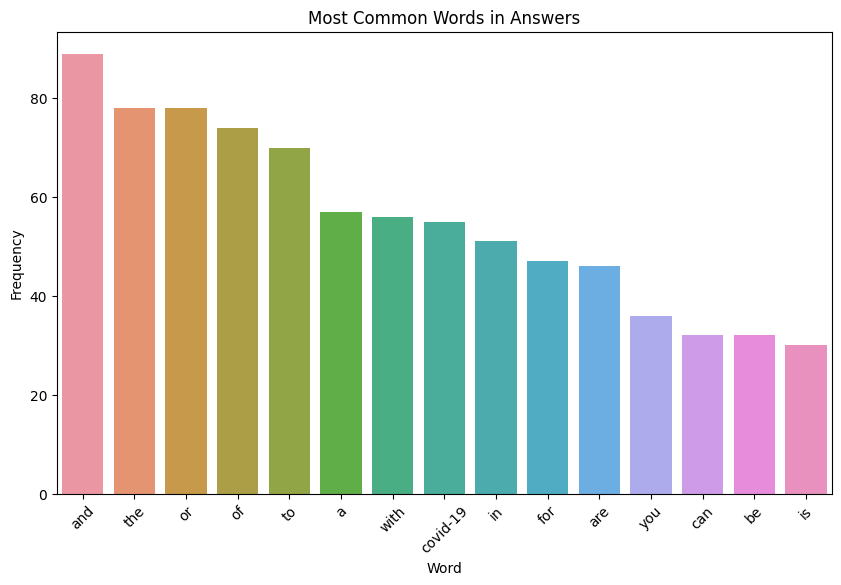

In [127]:
#Word Frequency Analysis
# for questions
from collections import Counter

# Word frequency analysis for questions
question_words = ' '.join(cdf['questions']).lower().split()
question_word_freq = Counter(question_words)

# Plotting the most common words in questions
common_question_words = question_word_freq.most_common(15)
common_question_words_df = pd.DataFrame(common_question_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=common_question_words_df)
plt.title('Most Common Words in Questions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# for answers
answer_words = ' '.join(cdf['answers']).lower().split()
answer_word_freq = Counter(answer_words)

# Plotting the most common words in answers
common_answer_words = answer_word_freq.most_common(15)
common_answer_words_df = pd.DataFrame(common_answer_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=common_answer_words_df)
plt.title('Most Common Words in Answers')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


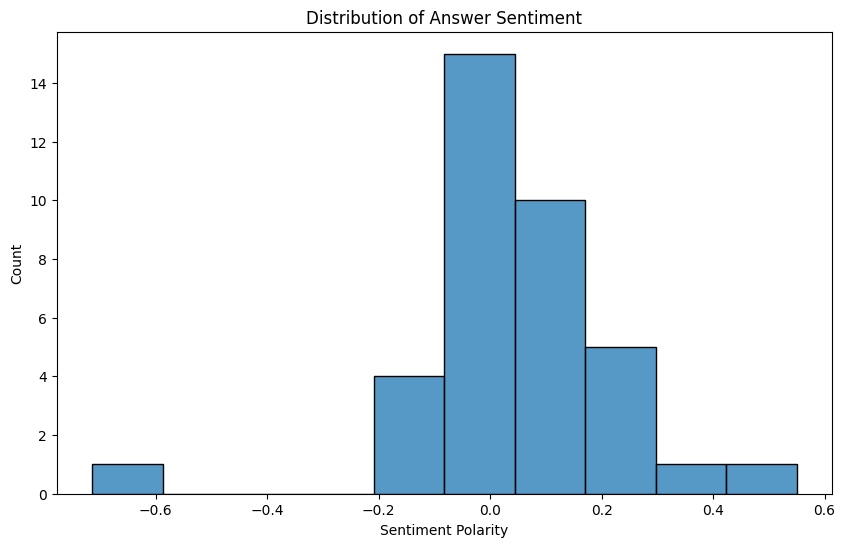

In [128]:
from textblob import TextBlob

# Sentiment analysis of answers
cdf['answer_sentiment'] = cdf['answers'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting the distribution of answer sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=cdf, x='answer_sentiment', bins=10)
plt.title('Distribution of Answer Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


## Creating YML file

In [129]:
pre_dataset

,questions,answers,question_length,answer_sentiment
0,covid19?,COVID-19 is the disease caused by a coronaviru...,8,0.128788
1,symptoms covid19?,The most common symptoms of COVID-19 arefever ...,17,-0.040952
2,happen people get covid19?,"As testing rates fall, it is more difficult to...",26,0.068417
3,risk severe illness covid19?,"People aged 60 years and over, and those with ...",28,-0.097411
4,longterm effect covid19?,"Some people who have had COVID-19, whether the...",24,-0.033333
5,protect others dont know infected?,You can protect yourself and others from COVID...,34,0.033766
6,get test covid19?,Anyone with symptoms such as acute onset of fe...,17,0.135782
7,test get see covid19?,There are two main types of tests that can con...,21,0.329167
8,want find covid19 past test could take?,Antibody tests can tell us whether someone has...,39,0.016061
9,difference isolation quarantine?,Both isolation and quarantine are methods of p...,32,0.003985


In [132]:
yml_dataset = pd.DataFrame()
yml_dataset[['questions', 'answers']] = pre_dataset[['questions', 'answers']]
yml_dataset["questions"] = yml_dataset['questions'].str.replace(' ', '_')


In [134]:
yml_dataset.head()

,questions,answers
0,covid19?,COVID-19 is the disease caused by a coronaviru...
1,symptoms_covid19?,The most common symptoms of COVID-19 arefever ...
2,happen_people_get_covid19?,"As testing rates fall, it is more difficult to..."
3,risk_severe_illness_covid19?,"People aged 60 years and over, and those with ..."
4,longterm_effect_covid19?,"Some people who have had COVID-19, whether the..."


In [135]:
df = yml_dataset

In [136]:
# Initialize an empty list to store the intents and responses
data = []
intent_counter = 1
response_counter = 1

# Iterate over the dataframe rows
for index, row in df.iterrows():
    question = row['questions']  # Replace 'Question' with the column name containing questions
    answer = row['answers']  # Replace 'Answer' with the column name containing answers

    intent = f"intent_{intent_counter}"  # Generate a unique intent name for each question-answer pair
    response = f"utter_{response_counter}"  # Generate a unique response name for each question-answer pair

    # Create the intent dictionary
    intent_dict = {
        "name": intent,
        "examples": [
            {"text": question}
        ]
    }

    # Create the response dictionary
    response_dict = {
        "name": response,
        "templates": [
            {"text": answer}
        ]
    }

    # Append the intent and response dictionaries to the data list
    data.append(intent_dict)
    data.append(response_dict)

    intent_counter += 1
    response_counter += 1

# Convert the data list to YAML format
yml_data = "---\n"
for item in data:
    yml_data += f"{item['name']}:\n"
    yml_data += f"  - {item['examples'][0]['text']}\n" if 'examples' in item else ""
    yml_data += f"  - {item['templates'][0]['text']}\n" if 'templates' in item else ""

# Save the YAML data to a file with UTF-8 encoding
with open('dataset.yml', 'w', encoding='utf-8') as file:
    file.write(yml_data)
